# Reproduce Figure 5 and S5

This notebook contains code to reproduce analyses in Figure 5 and S5 from Yang\*, Jones\* et al, _bioRxiv_ 2021.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [2]:
directory = '/WorkDir4/yanzeqin/220823_A00403_0863_AHMNGLDSX3/Script/AP-data/plot/Figure5_S5/data'

# 列出目录中的所有文件
all_files = os.listdir(directory)

# 筛选以".txt"结尾的文件
edit_distance_files = [f for f in all_files if f.endswith('_edit_distance_matrix.tsv')]
phylogenetic_distance_files = [f for f in all_files if f.endswith('_phylogenetic_distance_matrix.tsv')]
#edit_distance_files

In [ ]:
all_files

In [23]:
phylogenetic_distance_files

['GEM_RT_3_phylogenetic_distance_matrix.tsv',
 'CTR_MGH_7_phylogenetic_distance_matrix.tsv',
 'CTR_RT_1_phylogenetic_distance_matrix.tsv',
 'GEM_RT_7_phylogenetic_distance_matrix.tsv',
 'MI_MGH_2_phylogenetic_distance_matrix.tsv',
 'CTR_MGH_8_phylogenetic_distance_matrix.tsv',
 'NMI_MGH_4_phylogenetic_distance_matrix.tsv',
 'GEM_RT_2_phylogenetic_distance_matrix.tsv',
 'MI_MGH_1_phylogenetic_distance_matrix.tsv',
 'GEM_RT_9_phylogenetic_distance_matrix.tsv',
 'CTR_MGH_4_phylogenetic_distance_matrix.tsv',
 'NMI_MGH_6_phylogenetic_distance_matrix.tsv',
 'CTR_MGH_0_phylogenetic_distance_matrix.tsv',
 'GEM_RT_6_phylogenetic_distance_matrix.tsv',
 'NMI_MGH_5_phylogenetic_distance_matrix.tsv',
 'GEM_RT_18_phylogenetic_distance_matrix.tsv',
 'CTR_MGH_2_phylogenetic_distance_matrix.tsv',
 'GEM_RT_11_phylogenetic_distance_matrix.tsv',
 'CTR_MGH_11_phylogenetic_distance_matrix.tsv',
 'MI_MGH_3_phylogenetic_distance_matrix.tsv',
 'GEM_RT_13_phylogenetic_distance_matrix.tsv',
 'GEM_RT_16_phylogene

In [3]:
len(phylogenetic_distance_files)

50

In [4]:
import pandas as pd

edit_distance_matrices = []
phylogenetic_distance_matrices = []

for i in range(len(edit_distance_files)):
    edit_distance_matrix = pd.read_csv(os.path.join(directory, edit_distance_files[i]), sep='\t', index_col=0)
    phylogenetic_distance_matrix = pd.read_csv(os.path.join(directory, phylogenetic_distance_files[i]), sep='\t', index_col=0)
    edit_distance_matrices.append(edit_distance_matrix)
    phylogenetic_distance_matrices.append(phylogenetic_distance_matrix)

In [5]:
# 计算edit_distance_matrix和phylogenetic_distance_matrix的相关系数矩阵
correlation_matrices = []
for i in range(len(edit_distance_matrices)):
    correlation_matrix = edit_distance_matrices[i].corrwith(phylogenetic_distance_matrices[i], axis=1)
    correlation_matrices.append(correlation_matrix)

In [ ]:
correlation_matrices

In [24]:
correlation_matrices[6]

NMI_MGH.ACGGTCGCACGGTAGA    0.073096
NMI_MGH.ATTCCATGTCGTAATC    0.624855
NMI_MGH.GATTCGACAATGAAAC    0.650184
NMI_MGH.GGTAATCAGCTCCACG    0.438274
NMI_MGH.ATCGTCCCATAGACTC    0.392486
NMI_MGH.CAGTTAGCATTGCAAC    0.391513
NMI_MGH.CCTTCAGGTCCAGGTC    0.616622
NMI_MGH.GACCCAGAGTAGCAAT    0.534374
NMI_MGH.CAATTTCTCATTGAGC    0.431155
NMI_MGH.CAGATTGTCGTTAGTG    0.595987
NMI_MGH.TATTTCGAGTGCACTT    0.318354
NMI_MGH.TATTGCTTCCGTCAAA    0.519903
NMI_MGH.AGTTCCCCAGCTACTA    0.422155
NMI_MGH.AGTGCCGAGCAATAGT    0.554224
NMI_MGH.TATTTCGCACCAGCCA    0.322944
NMI_MGH.GTCATTTTCCACGTCT    0.580906
NMI_MGH.CAGATCACACTCTCGT    0.480014
NMI_MGH.GGAATGGAGTCTCCTC    0.498381
NMI_MGH.TGGATGTGTAGAATGT    0.560282
NMI_MGH.TCAATCTGTATGACAA    0.502247
NMI_MGH.TTTGATCTCTAGTCAG    0.367400
NMI_MGH.AGTACCAGTAATGTGA    0.346548
NMI_MGH.AAGATAGGTGCACGCT    0.394484
NMI_MGH.AGGATAATCAGTGTTG    0.269388
NMI_MGH.TAGACTGGTCCTGTTC    0.684637
NMI_MGH.GACTTCCGTTGCATTG    0.578768
NMI_MGH.TAGCACAAGAGCCATG    0.593021
N

ValueError: x and y must be the same size

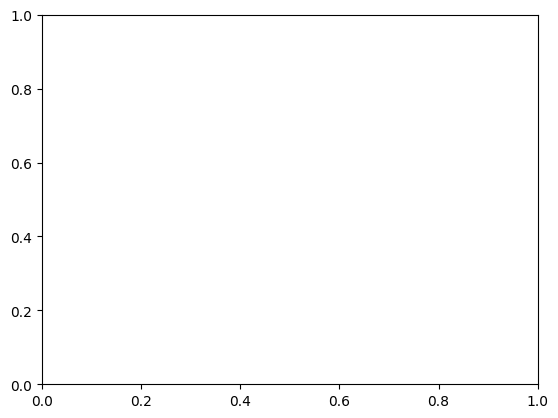

In [20]:
plt.scatter(edit_distance_matrices[25], phylogenetic_distance_matrices[6])
plt.xlabel('Edit distance')
plt.ylabel('Phylogenetic distance')

ValueError: x and y must be the same size

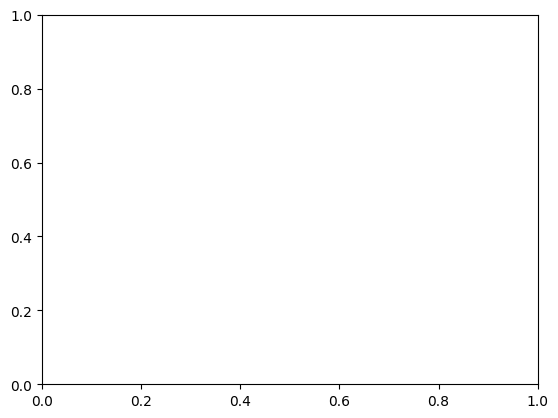

In [19]:
import matplotlib.pyplot as plt

# 绘制相关性散点图
for i in range(len(correlation_matrices)):
    plt.scatter(edit_distance_matrices[i], phylogenetic_distance_matrices[i])
    plt.xlabel('Edit distance')
    plt.ylabel('Phylogenetic distance')

In [22]:
data_directory = "/WorkDir4/yanzeqin/220823_A00403_0863_AHMNGLDSX3/Script/AP-data"
tumor_list = pd.read_csv(f"{data_directory}/plot/Figure5_S5/tumor_list.txt", sep='\t')['Tumor'].tolist()
tumor_list


list

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 定义读取数据的函数
def read_distance_matrix(distance_type, tumor_list):
    """
    读取距离矩阵中的数据
    distance_type: {'edit', 'phylogenetic'}
    tumor_list: 包含肿瘤名称的列表
    """
    distance_matrices = {}
    for tumor in tumor_list:
        file_path = f"/WorkDir4/yanzeqin/220823_A00403_0863_AHMNGLDSX3/Script/AP-data/plot/Figure5_S5/data/{tumor}_{distance_type}_distance_matrix.tsv"
        distance_matrix = pd.read_csv(file_path, sep='\t', index_col=0)
        distance_matrices[tumor] = distance_matrix
    return distance_matrices

# 读取基因表达的进化距离和序列编辑距离距离矩阵数据
phylogenetic_distance_matrices = read_distance_matrix('phylogenetic', tumor_list)
edit_distance_matrices = read_distance_matrix('edit', tumor_list)



In [27]:
# 计算相关系数
corr_list = []
tumors_to_process = []  # 存储成功处理的肿瘤
for tumor in tumor_list:
    phylogenetic_distance_matrix = phylogenetic_distance_matrices.get(tumor)
    edit_distance_matrix = edit_distance_matrices.get(tumor)
    if phylogenetic_distance_matrix is not None and edit_distance_matrix is not None:
        tumor_corr, _ = np.corrcoef(
            phylogenetic_distance_matrix.values.flatten(),
            edit_distance_matrix.values.flatten()
        )
        corr_list.append(tumor_corr)
        tumors_to_process.append(tumor)

/home/yanzeqin/miniconda3/envs/cassiopeia/lib/python3.10/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/yanzeqin/miniconda3/envs/cassiopeia/lib/python3.10/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [31]:
len(corr_list)

50

ValueError: x and y must be the same size

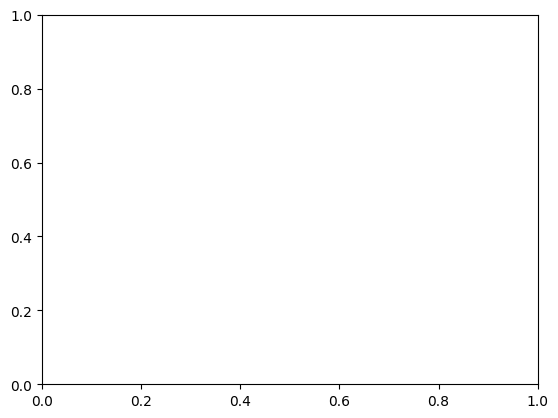

In [28]:
# 绘图
fig, ax = plt.subplots()
ax.scatter(
    range(len(tumors_to_process)),
    corr_list,
    marker='o',
    color='black',
    s=50
)
ax.set_xticks(range(len(tumors_to_process)))
ax.set_xticklabels(tumors_to_process)
ax.set_xlim(-0.5, len(tumors_to_process) - 0.5)
ax.set_ylabel('Correlation coefficient')
ax.set_title('Correlation between phylogenetic and edit distance')
plt.show()

In [ ]:
folder_path = '/WorkDir4/yanzeqin/220823_A00403_0863_AHMNGLDSX3/Script/AP-data/plot/Figure5_S5/data'
samples = []
print(os.listdir(folder_path))
for file in os.listdir(folder_path):
    if file.endswith('_matrix.tsv'):  # 假设距离矩阵文件以.txt结尾
        sample_name = file.split('.')[0]
    
    #print (sample_name)

In [ ]:
import os

folder_path = '/WorkDir4/yanzeqin/220823_A00403_0863_AHMNGLDSX3/Script/AP-data/plot/Figure5_S5/data'
samples = []
for file in os.listdir(folder_path):
    if file.endswith('.txt'):  # 假设距离矩阵文件以.txt结尾
        sample_name = file.split('.')[0]
        a_filename = os.path.join(folder_path, sample_name + '_a.txt')
        b_filename = os.path.join(folder_path, sample_name + '_b.txt')
        samples.append({'name': sample_name,
                        'a_matrix': read_distance_matrix(a_filename),
                        'b_matrix': read_distance_matrix(b_filename)})

In [ ]:
for sample in samples:
    a = sample['a_matrix'].flatten()
    b = sample['b_matrix'].flatten()
    corrcoef = np.corrcoef(a, b)[0, 1]
    plt.scatter(a, b)
    plt.title(f"Sample {sample['name']}, corrcoef={corrcoef:.2f}")
    plt.xlabel('a distance')
    plt.ylabel('b distance')
    plt.show()

In [17]:
# 计算等位基因距离和系统发育距离之间的相关性
edit_distances = []
phylo_distances = []
for i in range(len(edit_dists)):
    for j in range(i+1, len(edit_dists)):
        edit_matrix1 = edit_dists[i]
        edit_matrix2 = edit_dists[j]
        phylo_matrix1 = phylo_dists[i]
        phylo_matrix2 = phylo_dists[j]
        edit_distance = np.linalg.norm(edit_matrix1 - edit_matrix2)
        phylo_distance = np.linalg.norm(phylo_matrix1 - phylo_matrix2)
        edit_distances.append(edit_distance)
        phylo_distances.append(phylo_distance)

corr, pvalue = spearmanr(edit_distances, phylo_distances)  # 计算Spearman相关系数
print("Spearman correlation coefficient:", corr)
print("p-value:", pvalue)

ValueError: operands could not be broadcast together with shapes (29,29) (299,299) 

In [ ]:
plt.scatter(edit_distances, phylo_distances)
plt.xlabel("Edit distance")
plt.ylabel("Phylogenetic distance")
plt.title("Correlation between edit distance and phylogenetic distance")
plt.show()

## Evolutionary Coupling

### Compare phylotimes with different dissimilarity metrics - Figure S5J,K

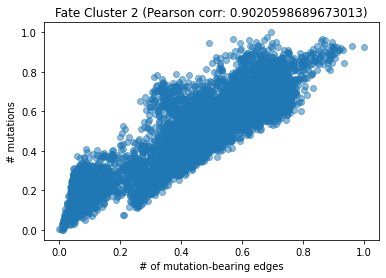

In [34]:
corr = stats.pearsonr(phylotimes_capped.loc[phylotimes_bl.index, 'distance'], phylotimes_bl['distance'])[0]

plt.scatter(phylotimes_capped.loc[phylotimes_bl.index, 'distance'], phylotimes_bl['distance'], alpha=0.5)
plt.xlabel("# of mutation-bearing edges")
plt.ylabel("# mutations")
plt.title(f'Fate Cluster 2 (Pearson corr: {corr})')
plt.show()

### Running tradeseq

Tradeseq was used to perform DE tests for each gene in each fate cluster across phylotime. The script located in `./scripts/run_tradeseq.r` contains the code used for this analysis.